# Indian Cars Resale Value Prediction 

### Importing Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plot
import sklearn.linear_model as models
import sklearn.metrics as metrics

In [2]:
#This data will be used to train the ML model.
df = pd.read_csv('data.csv')

### Data

In [3]:
df.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
df.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.950000


In [5]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

### Data Cleaning & Pre-Processing

Cleaning Data, Handling null values, uncertainty in data and missing values

In [6]:
#From above description, there are around 20 rows with missing data, so removing all those rows from data frame.
df.dropna(inplace=True, axis=0)
df.drop('Unnamed: 0', axis=1, inplace =True)

We need to change the data types of following attributes:

1. Mileage - float64 (contains float values followed by kmpl or km/kg)
2. Engine - int64 (contains integer values followed by cc or CC)
3. Power - float64 (contains float values followed by bhp)

Since there are some extra characters in the field (like cc, bhp), we cannot directly change the data type unless we remove those characters and since there are not many rows we can iterate over each row and replace those unnecessary characters

In [7]:
mil_list = []
for mileage in df['Mileage']:
    updated = float(mileage.rstrip('kmpl/kg '))
    mil_list.append(updated)

In [8]:
df = df.drop(columns=['Mileage'])

In [9]:
df['Mileage'] = mil_list

In [10]:
eng_list = []
for engine in df['Engine']:
    updated = int(engine.rstrip('ccCC '))
    eng_list.append(updated)

In [11]:
df = df.drop(columns=['Engine'])

In [12]:
df['Engine'] = eng_list

In [13]:
power_list = []

for power in df['Power']:
    #Power column also contains null values (Example: null bhp)
    updated = power.rstrip('bhp ')
    if(updated=="null"):
        updated = float('74') # Power of the most common vehicle in the data set
    updated = float(updated)
    power_list.append(updated)

In [14]:
df = df.drop(columns=['Power'])

In [15]:
df['Power'] = power_list

In [16]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
Mileage              float64
Engine                 int64
Power                float64
dtype: object

### Data Visualization

<AxesSubplot:xlabel='Engine', ylabel='Price'>

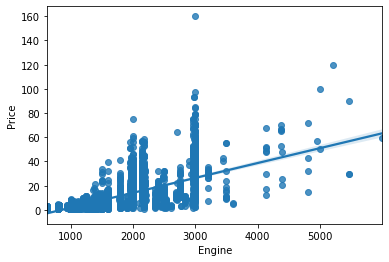

In [17]:
sb.regplot(y='Price', x='Engine', data=df)

<AxesSubplot:xlabel='Power', ylabel='Price'>

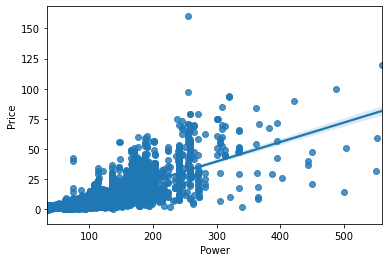

In [18]:
sb.regplot(y='Price', x='Power', data=df)

<AxesSubplot:xlabel='Year', ylabel='Price'>

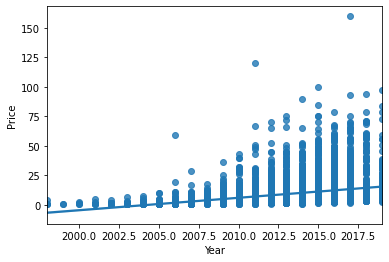

In [19]:
sb.regplot(y='Price', x='Year', data=df)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

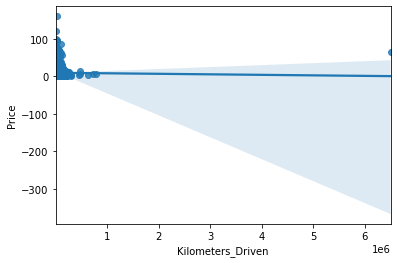

In [20]:
sb.regplot(y='Price', x='Kilometers_Driven', data=df)

In [21]:
corr = df.corr(method='pearson')
corr

,Year,Kilometers_Driven,Seats,Price,Mileage,Engine,Power
Year,1.000000,-0.172663,0.012338,0.305800,0.314417,-0.052538,0.034117
Kilometers_Driven,-0.172663,1.000000,0.083101,-0.011263,-0.064991,0.090832,0.030462
Seats,0.012338,0.083101,1.000000,0.052262,-0.308226,0.393435,0.103993
Price,0.305800,-0.011263,0.052262,1.000000,-0.313877,0.659117,0.772208
Mileage,0.314417,-0.064991,-0.308226,-0.313877,1.000000,-0.598638,-0.497725
Engine,-0.052538,0.090832,0.393435,0.659117,-0.598638,1.000000,0.860708
Power,0.034117,0.030462,0.103993,0.772208,-0.497725,0.860708,1.000000


<AxesSubplot:>

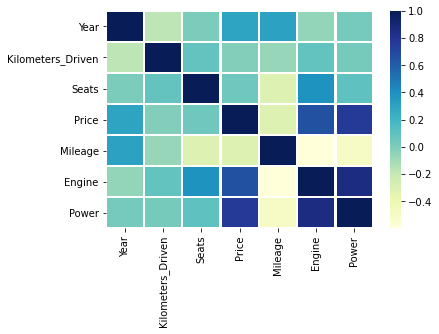

In [22]:
sb.heatmap(data=corr, linewidths=1.5, cmap="YlGnBu")

Strong Postive Corrleation between:
1. Power & Price
2. Engine & Price
3. Year & Price

Strong Negative Correlation between:
1. Mileage & Price

### Data Normalization
Columns containing higher values are more likely to influence the result during analysis. For example: Mileage is in double digits and Engine capacity is in four digits so Engine is more likely to influence the model. So, we need to normalize the numeric values to have an unbiased influence on the model.

In [23]:
#Normalizing using Z-Score method
df['Year'] = (df['Year']-df['Year'].mean())/df['Year'].std()
df['Kilometers_Driven'] = (df['Kilometers_Driven']-df['Kilometers_Driven'].mean())/df['Kilometers_Driven'].std()
df['Seats'] = (df['Seats']-df['Seats'].mean())/df['Seats'].std()
df['Mileage'] = (df['Mileage']-df['Mileage'].mean())/df['Mileage'].std()
df['Power'] = (df['Power']-df['Power'].mean())/df['Power'].std()

Converting Categorical Values into Numeric Values

In [24]:
fuel_type = pd.get_dummies(df['Fuel_Type']).astype('int64')
owner_type = pd.get_dummies(df['Owner_Type']).astype('int64')
transmission = pd.get_dummies(df['Transmission']).astype('int64')
df = df.join(fuel_type).join(owner_type).join(transmission)

In [25]:
df.drop('Fuel_Type', axis=1, inplace =True)
df.drop('Owner_Type', axis=1, inplace =True)
df.drop('Transmission', axis=1, inplace =True)

### Now our data is ready for analysis

In [26]:
df.describe()

,Year,Kilometers_Driven,Seats,Price,Mileage,Engine,Power,CNG,Diesel,LPG,Petrol,First,Fourth & Above,Second,Third,Automatic,Manual
count,5.975000e+03,5.975000e+03,5.975000e+03,5975.000000,5.975000e+03,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,9.892301e-15,-1.902709e-17,5.184881e-16,9.501647,-1.843249e-16,1621.606695,-4.043256e-17,0.009372,0.534728,0.001674,0.454226,0.820586,0.001339,0.159498,0.018577,0.286025,0.713975
std,1.000000e+00,1.000000e+00,1.000000e+00,11.205736,1.000000e+00,601.036987,1.000000e+00,0.096364,0.498834,0.040879,0.497942,0.383731,0.036570,0.366170,0.135038,0.451939,0.451939
min,-4.738421e+00,-6.389719e-01,-6.525460e+00,0.440000,-4.020391e+00,624.000000,-1.461061e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.270640e-01,-2.704971e-01,-3.446757e-01,3.500000,-6.588985e-01,1198.000000,-7.193474e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.888441e-01,-6.197474e-02,-3.446757e-01,5.650000,-4.291992e-03,1493.000000,-3.708536e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.047522e-01,1.564648e-01,-3.446757e-01,9.950000,6.458915e-01,1984.000000,4.752222e-01,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.728614e+00,7.035201e+01,5.836108e+00,160.000000,3.397008e+00,5998.000000,8.337763e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Development 
Model to be used in car resale value prediction:
Ridge Regression

In [32]:
#This regression model would only work on the numeric values so excluding all the string valued columns from data frame
train_data = df.drop(columns=['Price', 'Name', 'Location'], axis=1, inplace =False)

model_ridge = models.Ridge(alpha=0.1)
#Fit the training data into the model along with the target values i.e prices
model_ridge.fit(train_data, df['Price'])

Ridge(alpha=0.1)

In [33]:
#Now using the same data used for training again, but for testing the efficiency of the model
predictions = pd.Series(model_ridge.predict(train_data))
predictions = abs(predictions)  

In [34]:
metrics.r2_score(df['Price'], predictions)

0.711811555245873

### The r-square score of our the model is more than 0.7 which is a good score 
Now lets visualize the actual prices and the predicted prices

In [30]:
predictions = pd.DataFrame(predictions, columns=['Predicted Prices'])
predictions = predictions.join(df['Price'])
predictions.rename(columns={"Price": "Actual Prices"}, inplace=True)

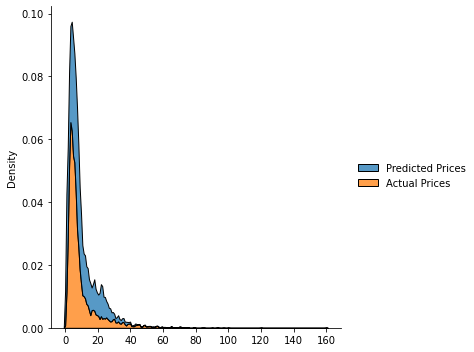

In [31]:
sb.displot(data=predictions, label='Prices', kind="kde", bw_adjust=0.2, multiple="stack", fill=True, rug=False)